# Diagonal Covarience Matrix :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns


In [2]:
# Function to compute the determinant of a matrix
def determinant(matrix):
    return np.linalg.det(matrix)

In [3]:
# Function to compute the inverse of a matrix
def inverse(matrix):
    return np.linalg.inv(matrix)


In [4]:
# Function to compute the multivariate Gaussian PDF manually
def multivariate_gaussian(x, mean, cov):
    d = len(x)
    cov_inv = inverse(cov)
    cov_det = determinant(cov)
    norm_factor = 1.0 / (np.power(2 * np.pi, d / 2) * np.sqrt(cov_det))
    x_mu = np.array(x - mean)
    exponent = -0.5 * np.dot(np.dot(x_mu.T, cov_inv), x_mu)
    return norm_factor * np.exp(exponent)

In [5]:
# Load the data from the files
class1_data = np.loadtxt('data/LS_data/Class1.txt')
class2_data = np.loadtxt('data/LS_data/Class2.txt')
class3_data = np.loadtxt('data/LS_data/Class3.txt')

In [6]:
len(class1_data)

500

In [7]:
len(class2_data)

500

In [8]:
len(class3_data)

500

In [9]:
# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]]

train1, test1 = train_test_split(class1_data)
train2, test2 = train_test_split(class2_data)
train3, test3 = train_test_split(class3_data)


In [10]:
print(train1.shape, test1.shape)

(350, 2) (150, 2)


In [11]:
print(train3.shape, test3.shape)

(350, 2) (150, 2)


In [12]:
# Calculate the mean and covariance for each class
mean1 = np.mean(train1, axis=0)
mean2 = np.mean(train2, axis=0)
mean3 = np.mean(train3, axis=0)

cov1 = np.cov(train1, rowvar=False)
cov2 = np.cov(train2, rowvar=False)
cov3 = np.cov(train3, rowvar=False)


In [13]:
mean1

array([1.44280767, 2.06198371])

In [14]:
mean2

array([  5.92489629, -11.98159971])

In [15]:
mean3

array([15.94304571, -3.98949576])

In [16]:
cov1

array([[8.80157416, 1.35490333],
       [1.35490333, 2.27040313]])

In [17]:
cov2

array([[ 2.78566289, -2.6447965 ],
       [-2.6447965 ,  4.75959253]])

In [18]:
cov3

array([[ 1.997432  ,  2.75188356],
       [ 2.75188356, 10.60939002]])

In [19]:
# Average the covariance matrices to get the common covariance matrix
average_cov = (cov1 + cov2 + cov3) / 3
sigma_squared = np.mean([np.var(train1), np.var(train2), np.var(train3)])

In [20]:
average_cov 

array([[4.52822302, 0.48733013],
       [0.48733013, 5.87979523]])

In [21]:
sigma_squared

65.05015616602412

In [22]:
# The common covariance matrix (σ^2 * I)
common_cov = sigma_squared * np.identity(average_cov.shape[0])

# Define the class priors (assuming equal priors here)
priors = [1/3, 1/3, 1/3]


In [23]:
common_cov

array([[65.05015617,  0.        ],
       [ 0.        , 65.05015617]])

In [24]:
# Define a function to compute the posterior probabilities using Bayes' theorem
def bayes_classifier(x, means, cov, priors):
    posteriors = []
    for i, mean in enumerate(means):
        likelihood = multivariate_gaussian(x, mean, cov)
        posterior = likelihood * priors[i]
        posteriors.append(posterior)
    return np.argmax(posteriors)

In [25]:
# Combine the training data and means
train_data = [train1, train2, train3]
means = [mean1, mean2, mean3]

In [26]:
means

[array([1.44280767, 2.06198371]),
 array([  5.92489629, -11.98159971]),
 array([15.94304571, -3.98949576])]

In [27]:
# Testing the classifier
test_data = np.vstack((test1, test2, test3))
true_labels = np.array([0]*len(test1) + [1]*len(test2) + [2]*len(test3))

predicted_labels = [bayes_classifier(x, means, common_cov, priors) for x in test_data]


In [28]:
print(test_data[1:10])

[[ 2.1437    1.2438  ]
 [ 2.1731    2.2868  ]
 [ 2.6252    4.665   ]
 [ 4.7984    1.2856  ]
 [ 3.2954   -0.40392 ]
 [ 1.8254    4.4692  ]
 [-0.99081  -0.049732]
 [-0.66911   1.2773  ]
 [ 4.7032    2.2195  ]]


In [29]:
print(true_labels[1:10])

[0 0 0 0 0 0 0 0 0]


In [30]:
print(predicted_labels[1:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [31]:
# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

Classifier Accuracy: 99.33%


In [32]:
# 1) Confusion matrix, classification accuracy, precision, recall, F-measure
conf_matrix = confusion_matrix(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f_measure = f1_score(true_labels, predicted_labels, average=None)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f_measure = np.mean(f_measure)

In [33]:
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[150   0   0]
 [  1 149   0]
 [  0   2 148]]


In [34]:
print("\nPrecision per class:", precision)


Precision per class: [0.99337748 0.98675497 1.        ]


In [35]:
print("Mean Precision:", mean_precision)

Mean Precision: 0.9933774834437087


In [36]:
print("\nRecall per class:", recall)


Recall per class: [1.         0.99333333 0.98666667]


In [37]:
print("Mean Recall:", mean_recall)

Mean Recall: 0.9933333333333333


In [38]:
print("\nF-Measure per class:", f_measure)


F-Measure per class: [0.99667774 0.99003322 0.99328859]


In [39]:
print("Mean F-Measure:", mean_f_measure)

Mean F-Measure: 0.9933331846863921


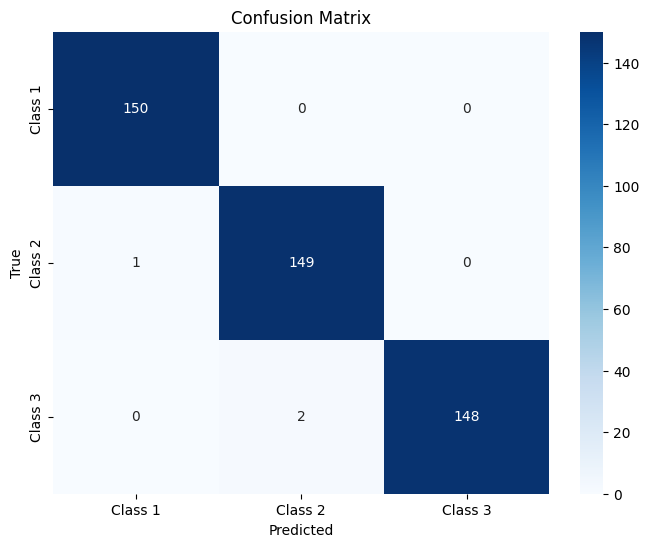

In [40]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

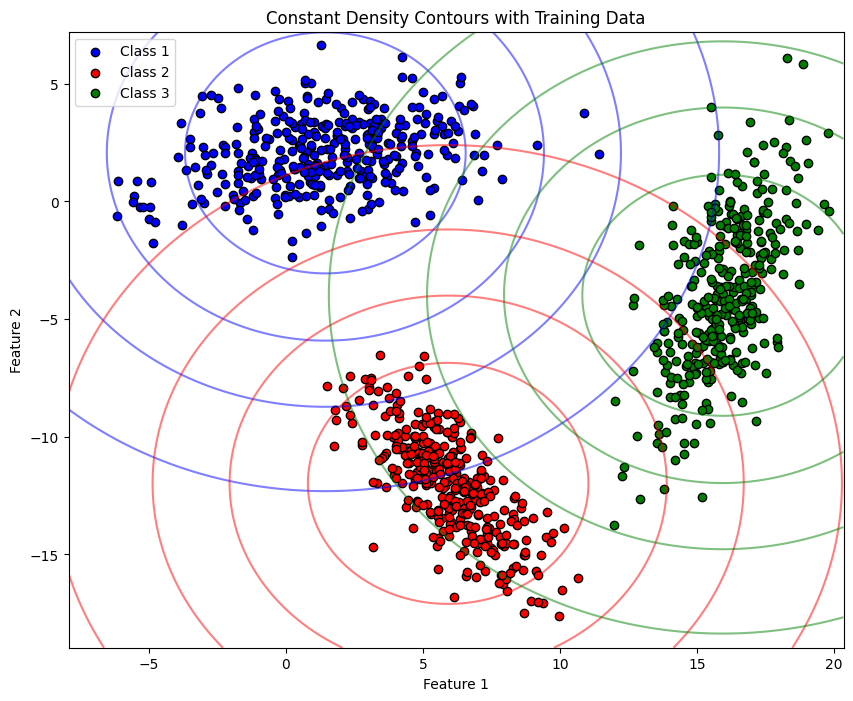

In [41]:
# 2) Constant density contour plot for all classes with training data superimposed
plt.figure(figsize=(10, 8))
x_min, x_max = test_data[:, 0].min() - 1, test_data[:, 0].max() + 1
y_min, y_max = test_data[:, 1].min() - 1, test_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

for mean, color in zip(means, ['blue', 'red', 'green']):
    density = np.array([multivariate_gaussian(point, mean, common_cov) for point in grid])
    density = density.reshape(xx.shape)
    plt.contour(xx, yy, density, colors=color, levels=5, alpha=0.5)

plt.scatter(train1[:, 0], train1[:, 1], c='blue', edgecolors='k', label='Class 1')
plt.scatter(train2[:, 0], train2[:, 1], c='red', edgecolors='k', label='Class 2')
plt.scatter(train3[:, 0], train3[:, 1], c='green', edgecolors='k', label='Class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Constant Density Contours with Training Data')
plt.legend()
plt.show()

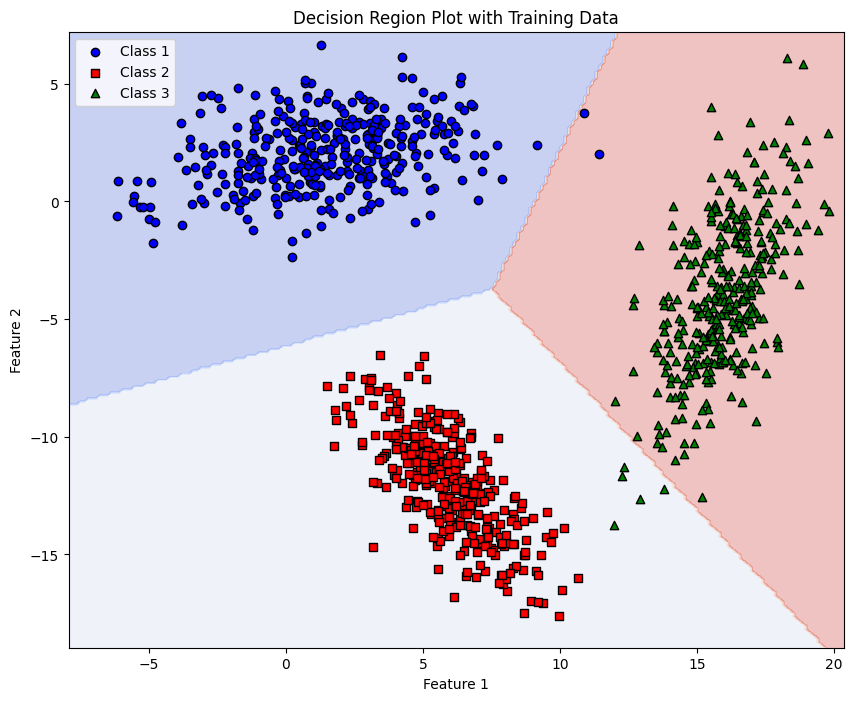

In [42]:
# 3) Decision region plot superimposed by training data
plt.figure(figsize=(10, 8))
grid_predictions = np.array([bayes_classifier(point, means, common_cov, priors) for point in grid])
grid_predictions = grid_predictions.reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')
plt.scatter(train1[:, 0], train1[:, 1], c='blue', edgecolors='k', label='Class 1', marker='o')
plt.scatter(train2[:, 0], train2[:, 1], c='red', edgecolors='k', label='Class 2', marker='s')
plt.scatter(train3[:, 0], train3[:, 1], c='green', edgecolors='k', label='Class 3', marker='^')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data')
plt.legend()
plt.show()

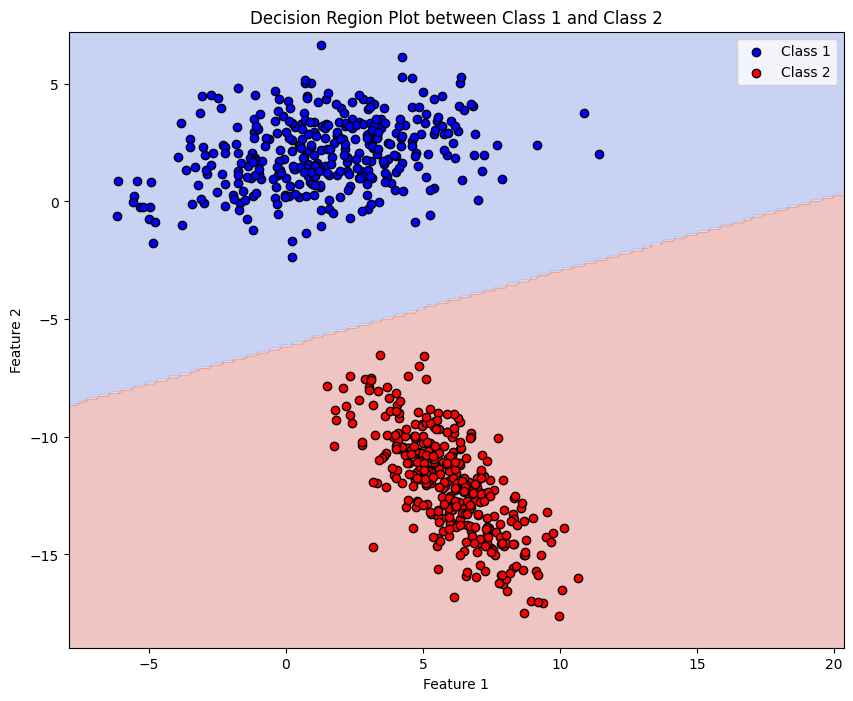

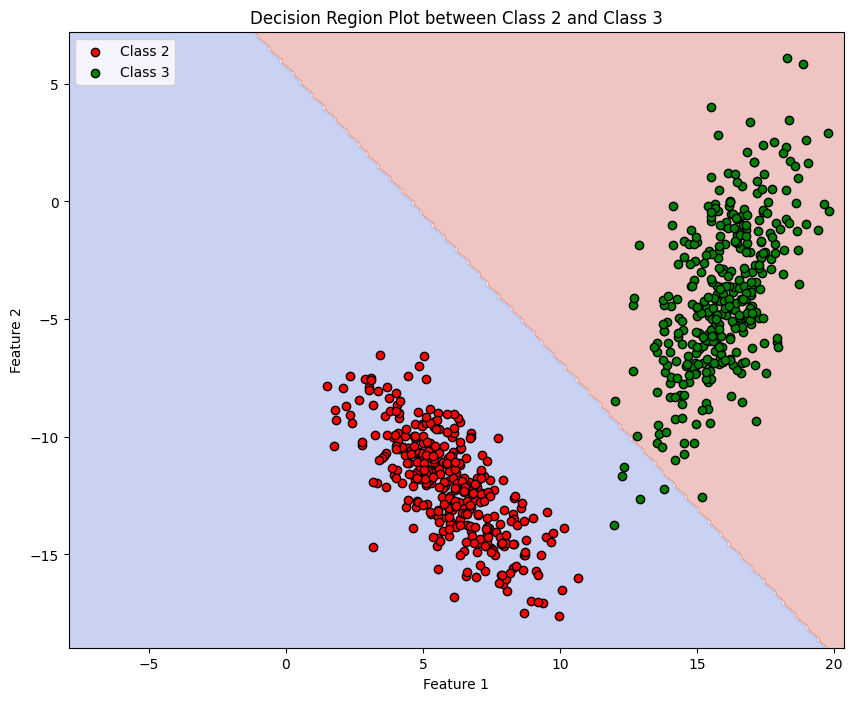

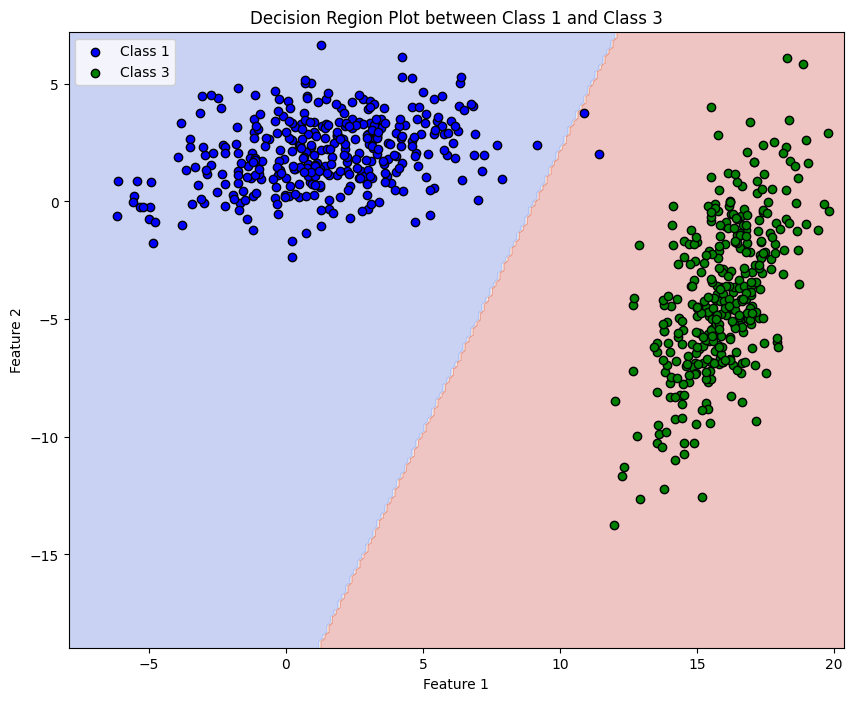

In [43]:
# Decision region plots for each pair of classes
def plot_decision_boundary(classes, colors, labels):
    plt.figure(figsize=(10, 8))
    selected_means = [means[c] for c in classes]
    selected_priors = [priors[c] for c in classes]
    grid_predictions = np.array([bayes_classifier(point, selected_means, common_cov, selected_priors) for point in grid])
    grid_predictions = grid_predictions.reshape(xx.shape)

    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')
    for i, c in enumerate(classes):
        plt.scatter(train_data[c][:, 0], train_data[c][:, 1], c=colors[i], edgecolors='k', label=labels[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region Plot between {labels[0]} and {labels[1]}')
    plt.legend()
    plt.show()
    # Plot decision regions for each pair of classes
plot_decision_boundary([0, 1], ['blue', 'red'], ['Class 1', 'Class 2'])
plot_decision_boundary([1, 2], ['red', 'green'], ['Class 2', 'Class 3'])
plot_decision_boundary([0, 2], ['blue', 'green'], ['Class 1', 'Class 3'])

# 2. Full Covariance matrix for all the classes is the same and is Σ.

Classifier Accuracy: 99.56%

Confusion Matrix:
 [[150   0   0]
 [  1 149   0]
 [  0   1 149]]

Precision per class: [0.99337748 0.99333333 1.        ]
Mean Precision: 0.995570272259014

Recall per class: [1.         0.99333333 0.99333333]
Mean Recall: 0.9955555555555554

F-Measure per class: [0.99667774 0.99333333 0.99665552]
Mean F-Measure: 0.9955555308639231


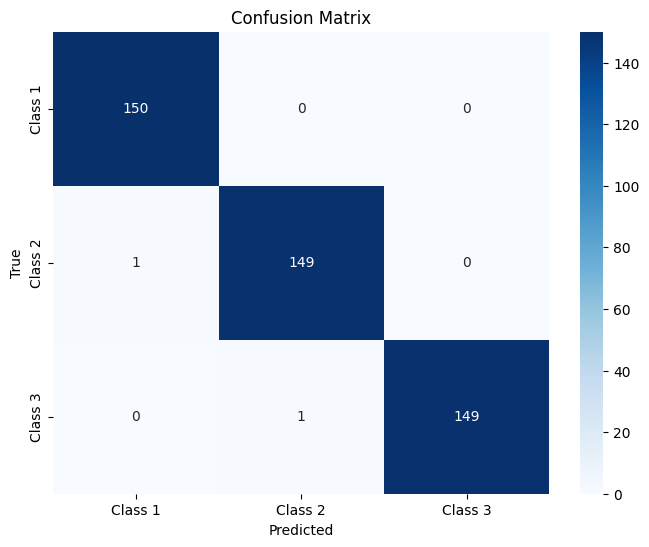

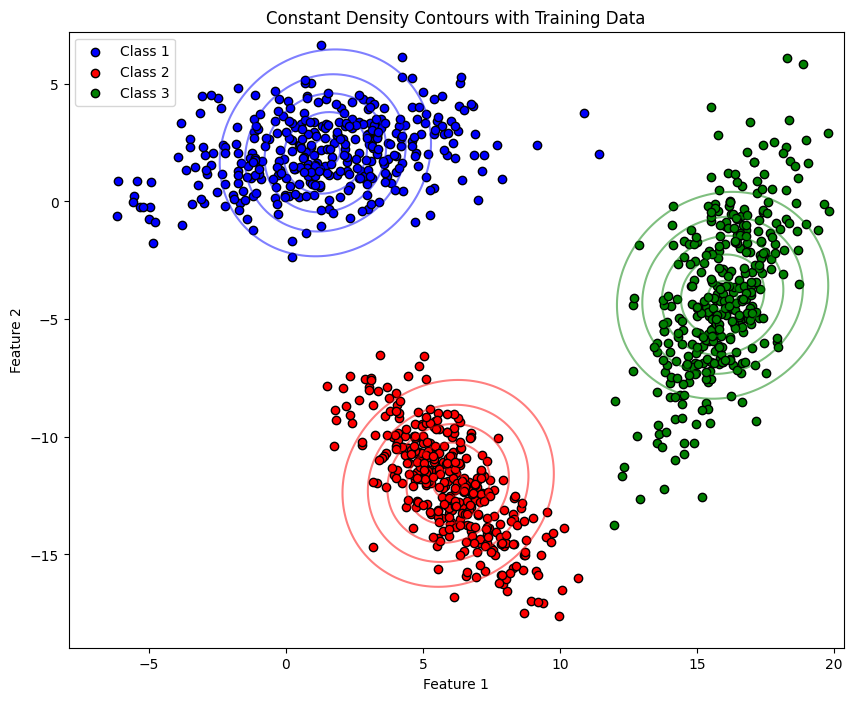

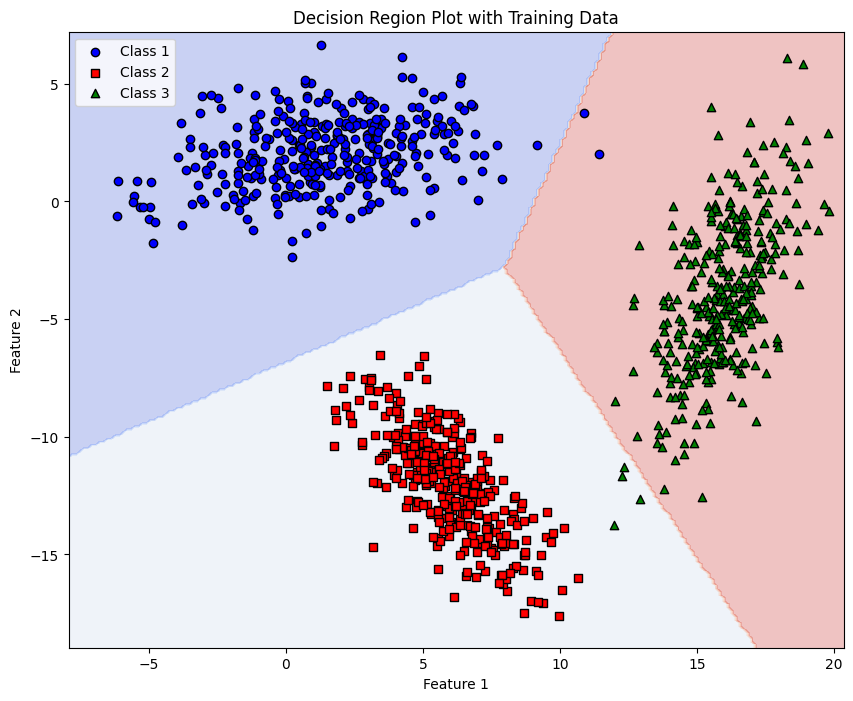

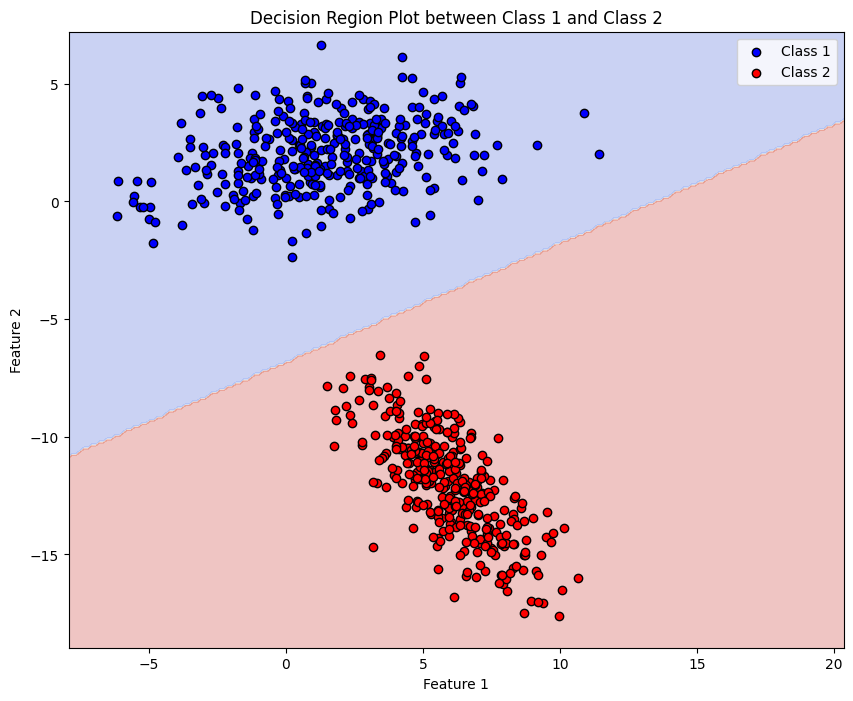

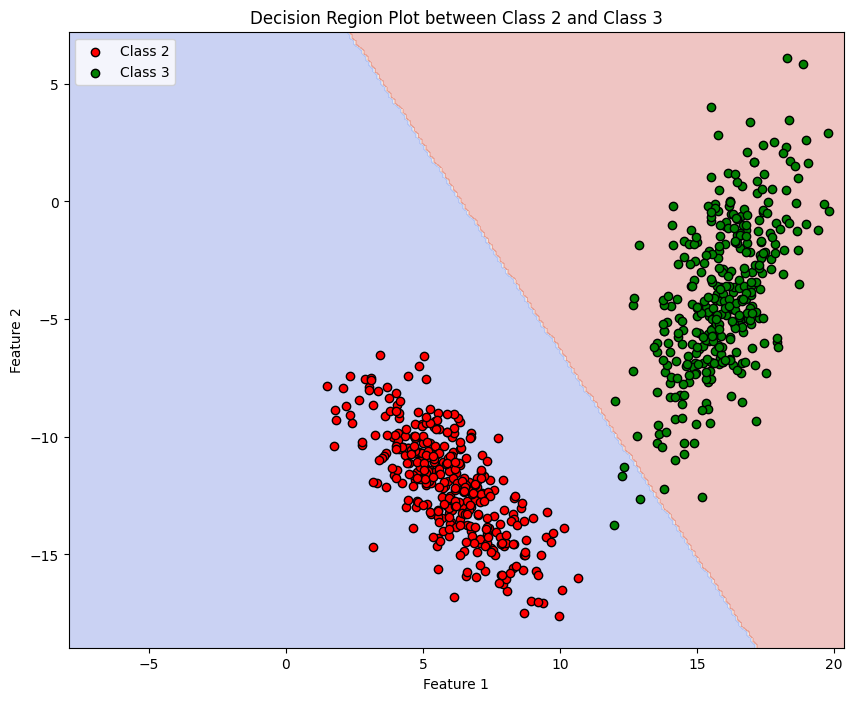

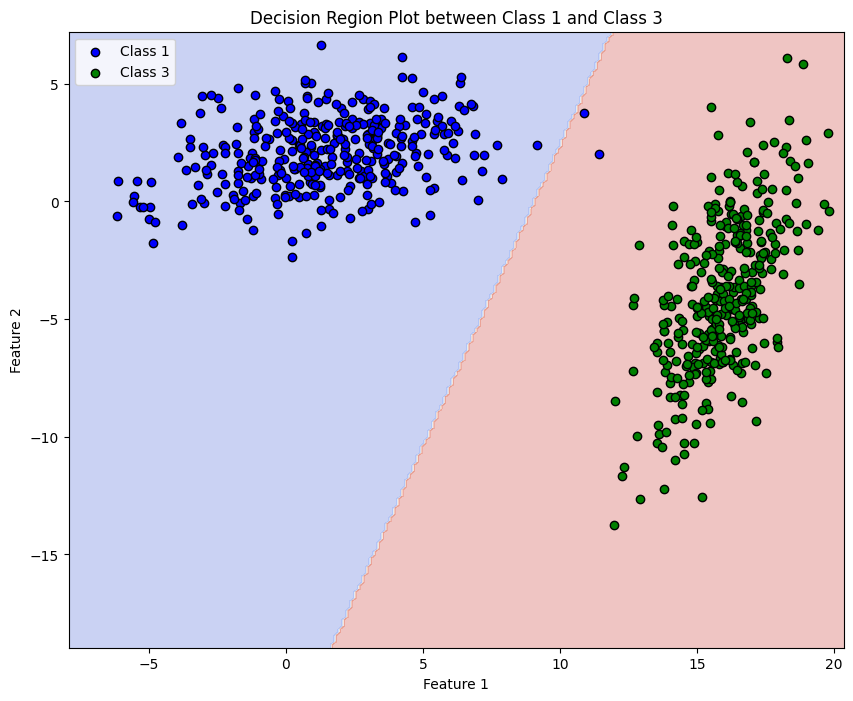

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Function to compute the determinant of a matrix
def determinant(matrix):
    return np.linalg.det(matrix)

# Function to compute the inverse of a matrix
def inverse(matrix):
    return np.linalg.inv(matrix)

# Function to compute the multivariate Gaussian PDF manually
def multivariate_gaussian(x, mean, cov):
    d = len(x)
    cov_inv = inverse(cov)
    cov_det = determinant(cov)
    norm_factor = 1.0 / (np.power(2 * np.pi, d / 2) * np.sqrt(cov_det))
    x_mu = np.array(x - mean)
    exponent = -0.5 * np.dot(np.dot(x_mu.T, cov_inv), x_mu)
    return norm_factor * np.exp(exponent)

# Load the data from the files
# class1_data = np.loadtxt('LS_Group03\\Class1.txt')
# class2_data = np.loadtxt('LS_Group03\\Class2.txt')
# class3_data = np.loadtxt('LS_Group03\\Class3.txt')

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]]

train1, test1 = train_test_split(class1_data)
train2, test2 = train_test_split(class2_data)
train3, test3 = train_test_split(class3_data)

# Calculate the mean and covariance for each class
mean1 = np.mean(train1, axis=0)
mean2 = np.mean(train2, axis=0)
mean3 = np.mean(train3, axis=0)

cov1 = np.cov(train1, rowvar=False)
cov2 = np.cov(train2, rowvar=False)
cov3 = np.cov(train3, rowvar=False)

# Average the covariance matrices to get the common covariance matrix
common_cov = (cov1 + cov2 + cov3) / 3

# Define the class priors (assuming equal priors here)
priors = [1/3, 1/3, 1/3]

# Define a function to compute the posterior probabilities using Bayes' theorem
def bayes_classifier(x, means, cov, priors):
    posteriors = []
    for i, mean in enumerate(means):
        likelihood = multivariate_gaussian(x, mean, cov)
        posterior = likelihood * priors[i]
        posteriors.append(posterior)
    return np.argmax(posteriors)

# Combine the training data and means
train_data = [train1, train2, train3]
means = [mean1, mean2, mean3]

# Testing the classifier
test_data = np.vstack((test1, test2, test3))
true_labels = np.array([0]*len(test1) + [1]*len(test2) + [2]*len(test3))

predicted_labels = [bayes_classifier(x, means, common_cov, priors) for x in test_data]

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# 1) Confusion matrix, classification accuracy, precision, recall, F-measure
conf_matrix = confusion_matrix(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f_measure = f1_score(true_labels, predicted_labels, average=None)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f_measure = np.mean(f_measure)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nPrecision per class:", precision)
print("Mean Precision:", mean_precision)
print("\nRecall per class:", recall)
print("Mean Recall:", mean_recall)
print("\nF-Measure per class:", f_measure)
print("Mean F-Measure:", mean_f_measure)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2) Constant density contour plot for all classes with training data superimposed
plt.figure(figsize=(10, 8))
x_min, x_max = test_data[:, 0].min() - 1, test_data[:, 0].max() + 1
y_min, y_max = test_data[:, 1].min() - 1, test_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

for mean, color in zip(means, ['blue', 'red', 'green']):
    density = np.array([multivariate_gaussian(point, mean, common_cov) for point in grid])
    density = density.reshape(xx.shape)
    plt.contour(xx, yy, density, colors=color, levels=5, alpha=0.5)

plt.scatter(train1[:, 0], train1[:, 1], c='blue', edgecolors='k', label='Class 1')
plt.scatter(train2[:, 0], train2[:, 1], c='red', edgecolors='k', label='Class 2')
plt.scatter(train3[:, 0], train3[:, 1], c='green', edgecolors='k', label='Class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Constant Density Contours with Training Data')
plt.legend()
plt.show()

# 3) Decision region plot superimposed by training data
plt.figure(figsize=(10, 8))
grid_predictions = np.array([bayes_classifier(point, means, common_cov, priors) for point in grid])
grid_predictions = grid_predictions.reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')
plt.scatter(train1[:, 0], train1[:, 1], c='blue', edgecolors='k', label='Class 1', marker='o')
plt.scatter(train2[:, 0], train2[:, 1], c='red', edgecolors='k', label='Class 2', marker='s')
plt.scatter(train3[:, 0], train3[:, 1], c='green', edgecolors='k', label='Class 3', marker='^')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data')
plt.legend()
plt.show()

# Decision region plots for each pair of classes
def plot_decision_boundary(classes, colors, labels):
    plt.figure(figsize=(10, 8))
    selected_means = [means[c] for c in classes]
    selected_priors = [priors[c] for c in classes]
    grid_predictions = np.array([bayes_classifier(point, selected_means, common_cov, selected_priors) for point in grid])
    grid_predictions = grid_predictions.reshape(xx.shape)

    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')
    for i, c in enumerate(classes):
        plt.scatter(train_data[c][:, 0], train_data[c][:, 1], c=colors[i], edgecolors='k', label=labels[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region Plot between {labels[0]} and {labels[1]}')
    plt.legend()
    plt.show()

# Plot decision regions for each pair of classes
plot_decision_boundary([0, 1], ['blue', 'red'], ['Class 1', 'Class 2'])
plot_decision_boundary([1, 2], ['red', 'green'], ['Class 2', 'Class 3'])
plot_decision_boundary([0, 2], ['blue', 'green'], ['Class 1', 'Class 3'])


# 3. Covariance matric is diagonal and is different for each class.

Classifier Accuracy: 100.00%

Confusion Matrix:
 [[150   0   0]
 [  0 150   0]
 [  0   0 150]]

Precision per class: [1. 1. 1.]
Mean Precision: 1.0

Recall per class: [1. 1. 1.]
Mean Recall: 1.0

F-Measure per class: [1. 1. 1.]
Mean F-Measure: 1.0


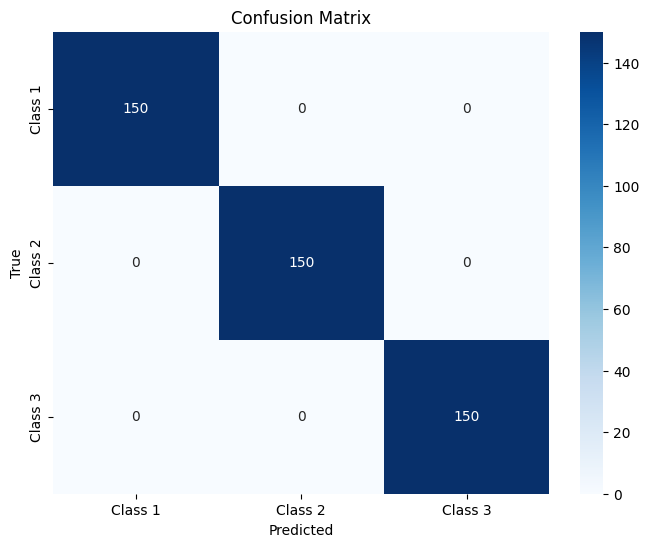

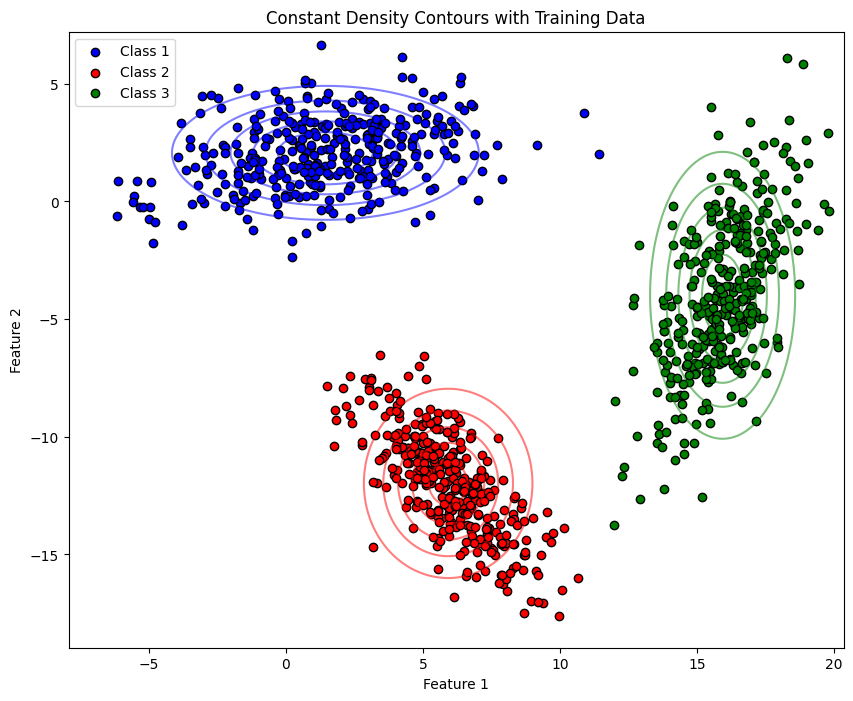

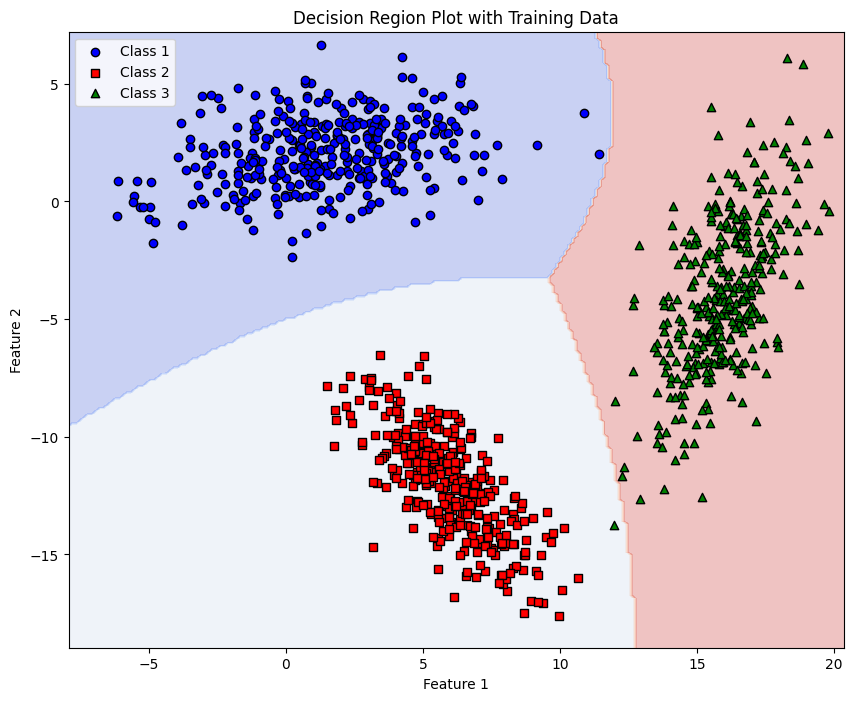

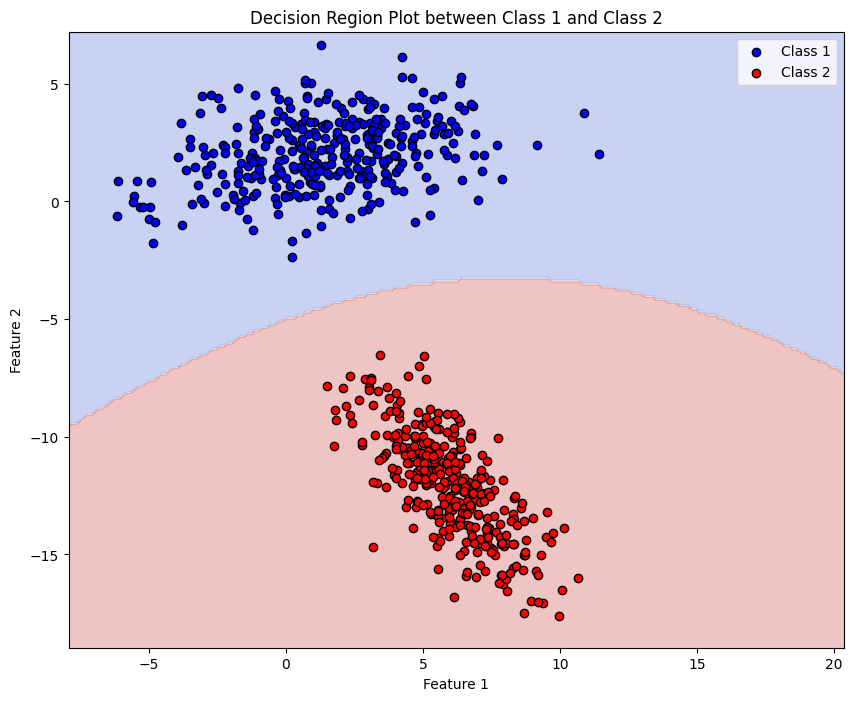

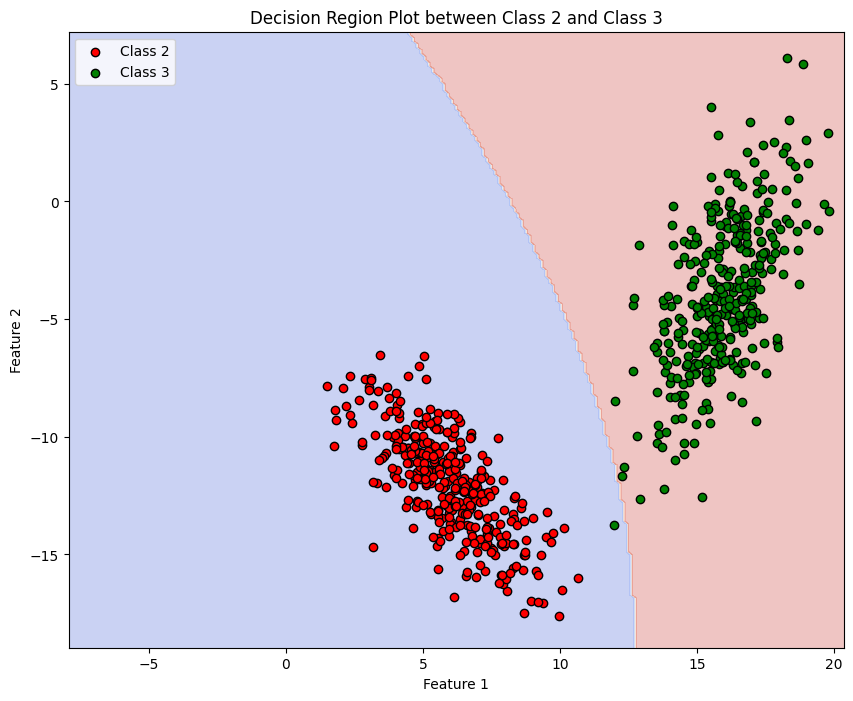

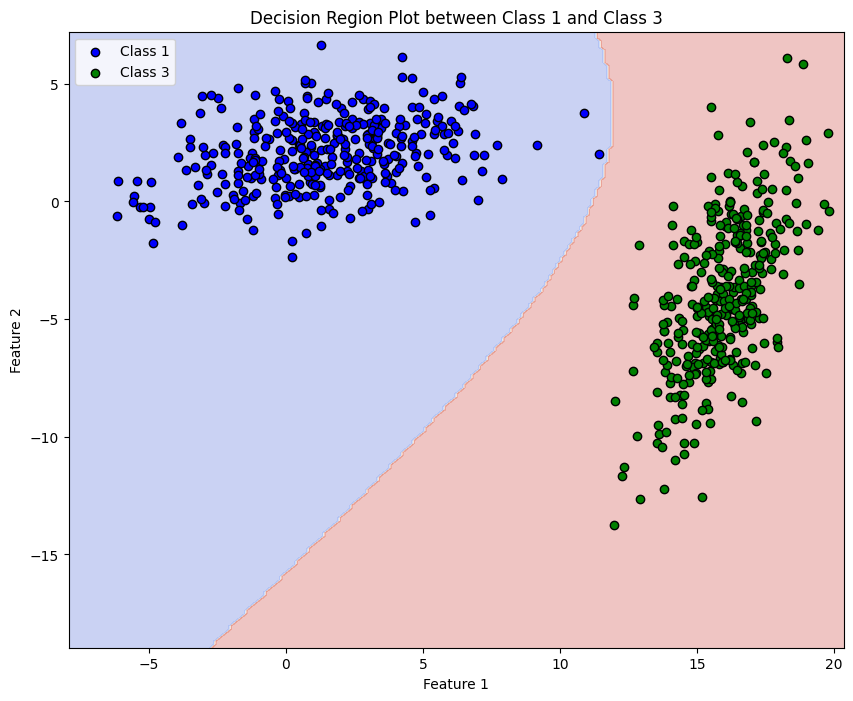

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Function to compute the multivariate Gaussian PDF for diagonal covariance
def multivariate_gaussian_diagonal(x, mean, diag_cov):
    d = len(x)
    norm_factor = 1.0 / np.sqrt((2 * np.pi) ** d * np.prod(diag_cov))
    x_mu = x - mean
    exponent = -0.5 * np.sum((x_mu ** 2) / diag_cov)
    return norm_factor * np.exp(exponent)

# Load the data from the files
# class1_data = np.loadtxt('Group03\\LS_Group03\\Class1.txt')
# class2_data = np.loadtxt('Group03\\LS_Group03\\Class2.txt')
# class3_data = np.loadtxt('Group03\\LS_Group03\\Class3.txt')

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]]

train1, test1 = train_test_split(class1_data)
train2, test2 = train_test_split(class2_data)
train3, test3 = train_test_split(class3_data)

# Calculate the mean and diagonal covariance for each class
mean1 = np.mean(train1, axis=0)
mean2 = np.mean(train2, axis=0)
mean3 = np.mean(train3, axis=0)

cov1 = np.cov(train1, rowvar=False)
cov2 = np.cov(train2, rowvar=False)
cov3 = np.cov(train3, rowvar=False)

# Keep only the diagonal elements of the covariance matrices
diag_cov1 = np.diag(np.diag(cov1))
diag_cov2 = np.diag(np.diag(cov2))
diag_cov3 = np.diag(np.diag(cov3))

# Define the class priors (assuming equal priors here)
priors = [1/3, 1/3, 1/3]

# Define a function to compute the posterior probabilities using Bayes' theorem
def bayes_classifier(x, means, diag_covs, priors):
    posteriors = []
    for i, mean in enumerate(means):
        likelihood = multivariate_gaussian_diagonal(x, mean, np.diag(diag_covs[i]))
        posterior = likelihood * priors[i]
        posteriors.append(posterior)
    return np.argmax(posteriors)

# Combine the training data and means
train_data = [train1, train2, train3]
means = [mean1, mean2, mean3]
diag_covs = [diag_cov1, diag_cov2, diag_cov3]

# Testing the classifier
test_data = np.vstack((test1, test2, test3))
true_labels = np.array([0]*len(test1) + [1]*len(test2) + [2]*len(test3))

predicted_labels = [bayes_classifier(x, means, diag_covs, priors) for x in test_data]

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# 1) Confusion matrix, classification accuracy, precision, recall, F-measure
conf_matrix = confusion_matrix(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f_measure = f1_score(true_labels, predicted_labels, average=None)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f_measure = np.mean(f_measure)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nPrecision per class:", precision)
print("Mean Precision:", mean_precision)
print("\nRecall per class:", recall)
print("Mean Recall:", mean_recall)
print("\nF-Measure per class:", f_measure)
print("Mean F-Measure:", mean_f_measure)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2) Constant density contour plot for all classes with training data superimposed
plt.figure(figsize=(10, 8))
x_min, x_max = test_data[:, 0].min() - 1, test_data[:, 0].max() + 1
y_min, y_max = test_data[:, 1].min() - 1, test_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

for mean, diag_cov, color in zip(means, diag_covs, ['blue', 'red', 'green']):
    density = np.array([multivariate_gaussian_diagonal(point, mean, np.diag(diag_cov)) for point in grid])
    density = density.reshape(xx.shape)
    plt.contour(xx, yy, density, colors=color, levels=5, alpha=0.5)

plt.scatter(train1[:, 0], train1[:, 1], c='blue', edgecolors='k', label='Class 1')
plt.scatter(train2[:, 0], train2[:, 1], c='red', edgecolors='k', label='Class 2')
plt.scatter(train3[:, 0], train3[:, 1], c='green', edgecolors='k', label='Class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Constant Density Contours with Training Data')
plt.legend()
plt.show()

# 3) Decision region plot superimposed by training data
plt.figure(figsize=(10, 8))
grid_predictions = np.array([bayes_classifier(point, means, diag_covs, priors) for point in grid])
grid_predictions = grid_predictions.reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')
plt.scatter(train1[:, 0], train1[:, 1], c='blue', edgecolors='k', label='Class 1', marker='o')
plt.scatter(train2[:, 0], train2[:, 1], c='red', edgecolors='k', label='Class 2', marker='s')
plt.scatter(train3[:, 0], train3[:, 1], c='green', edgecolors='k', label='Class 3', marker='^')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data')
plt.legend()
plt.show()

# Decision region plots for each pair of classes
def plot_decision_boundary(classes, colors, labels):
    plt.figure(figsize=(10, 8))
    selected_means = [means[c] for c in classes]
    selected_diag_covs = [diag_covs[c] for c in classes]
    selected_priors = [priors[c] for c in classes]
    grid_predictions = np.array([bayes_classifier(point, selected_means, selected_diag_covs, selected_priors) for point in grid])
    grid_predictions = grid_predictions.reshape(xx.shape)

    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')
    for i, c in enumerate(classes):
        plt.scatter(train_data[c][:, 0], train_data[c][:, 1], c=colors[i], edgecolors='k', label=labels[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region Plot between {labels[0]} and {labels[1]}')
    plt.legend()
    plt.show()

# Plot decision regions for each pair of classes
plot_decision_boundary([0, 1], ['blue', 'red'], ['Class 1', 'Class 2'])
plot_decision_boundary([1, 2], ['red', 'green'], ['Class 2', 'Class 3'])
plot_decision_boundary([0, 2], ['blue', 'green'], ['Class 1', 'Class 3'])


 # 4.Full covariance matrix for each class is different.

Classifier Accuracy: 100.00%

Confusion Matrix:
 [[150   0   0]
 [  0 150   0]
 [  0   0 150]]

Precision per class: [1. 1. 1.]
Mean Precision: 1.0

Recall per class: [1. 1. 1.]
Mean Recall: 1.0

F-Measure per class: [1. 1. 1.]
Mean F-Measure: 1.0


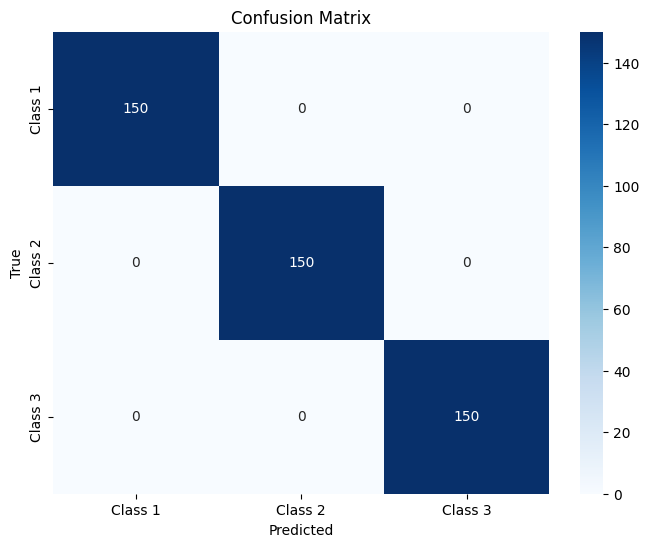

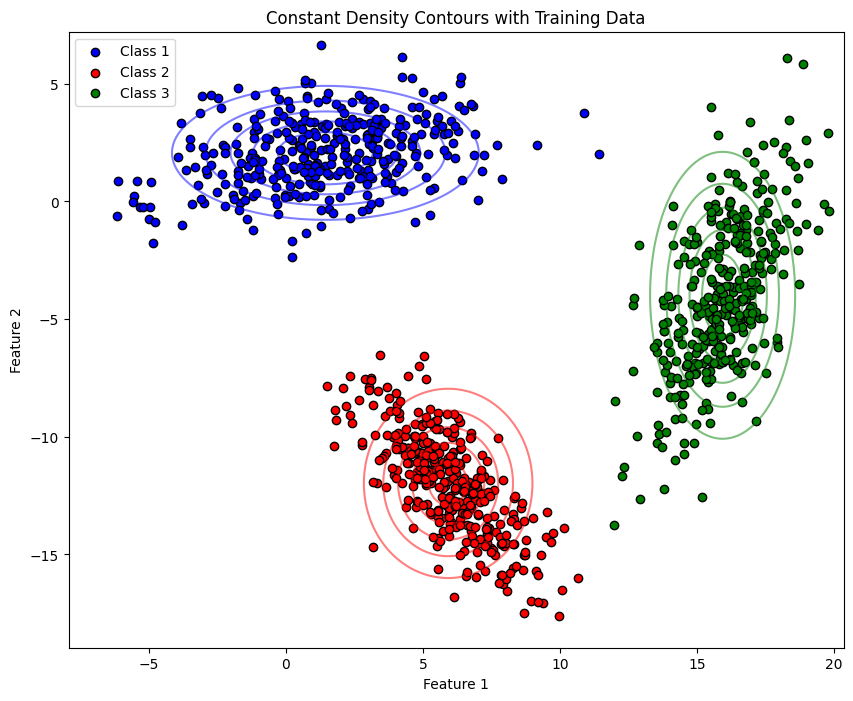

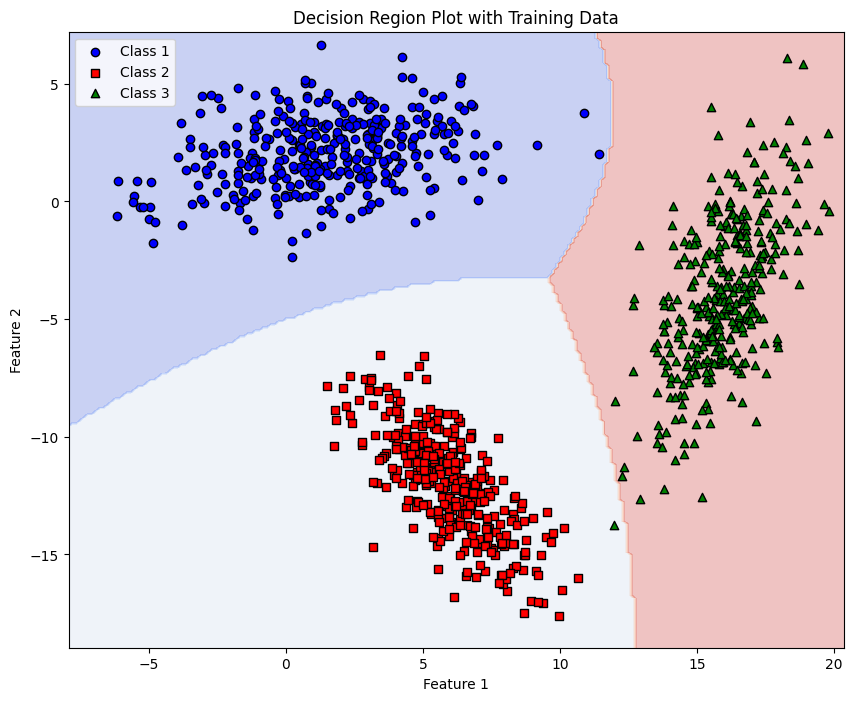

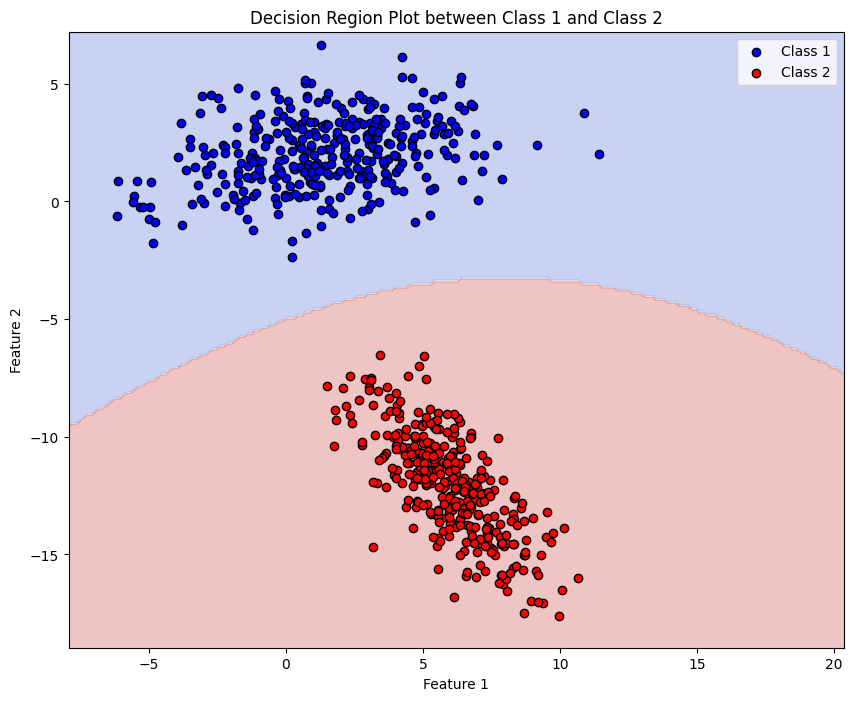

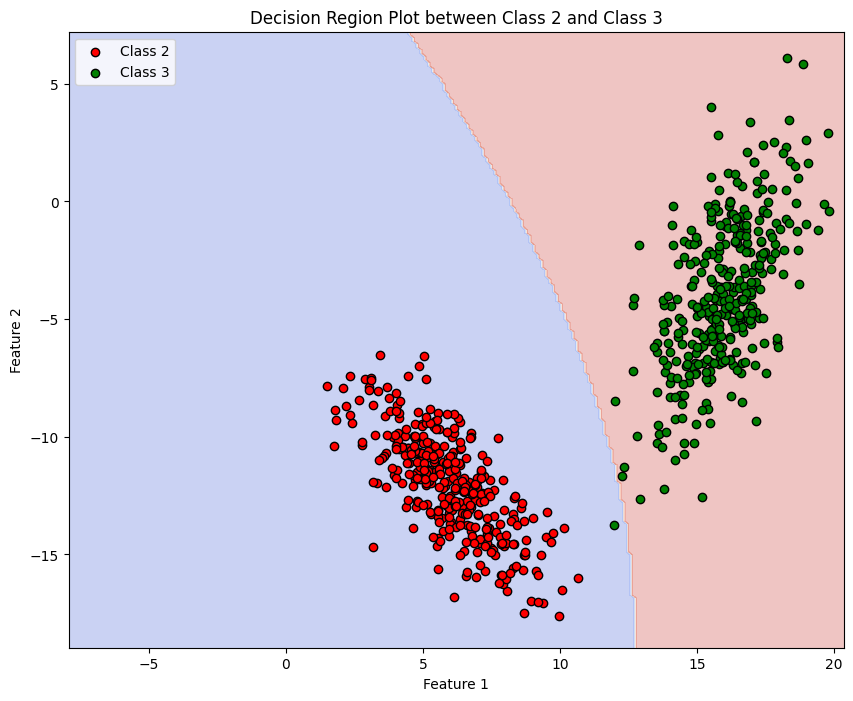

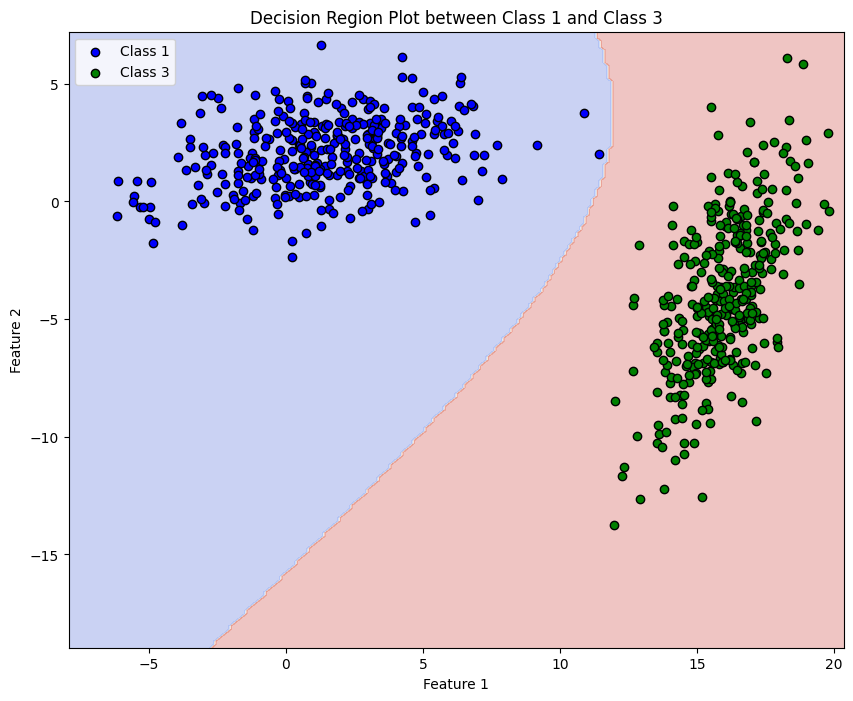

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Function to compute the multivariate Gaussian PDF for diagonal covariance
def multivariate_gaussian_diagonal(x, mean, diag_cov):
    d = len(x)
    norm_factor = 1.0 / np.sqrt((2 * np.pi) ** d * np.prod(diag_cov))
    x_mu = x - mean
    exponent = -0.5 * np.sum((x_mu ** 2) / diag_cov)
    return norm_factor * np.exp(exponent)

# Load the data from the files
# class1_data = np.loadtxt('LS_Group03\\Class1.txt')
# class2_data = np.loadtxt('LS_Group03\\Class2.txt')
# class3_data = np.loadtxt('LS_Group03\\Class3.txt')

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]]

train1, test1 = train_test_split(class1_data)
train2, test2 = train_test_split(class2_data)
train3, test3 = train_test_split(class3_data)

# Calculate the mean and diagonal covariance for each class
mean1 = np.mean(train1, axis=0)
mean2 = np.mean(train2, axis=0)
mean3 = np.mean(train3, axis=0)

cov1 = np.cov(train1, rowvar=False)
cov2 = np.cov(train2, rowvar=False)
cov3 = np.cov(train3, rowvar=False)

# Keep only the diagonal elements of the covariance matrices
diag_cov1 = np.diag(np.diag(cov1))
diag_cov2 = np.diag(np.diag(cov2))
diag_cov3 = np.diag(np.diag(cov3))

# Define the class priors (assuming equal priors here)
priors = [1/3, 1/3, 1/3]

# Define a function to compute the posterior probabilities using Bayes' theorem
def bayes_classifier(x, means, diag_covs, priors):
    posteriors = []
    for i, mean in enumerate(means):
        likelihood = multivariate_gaussian_diagonal(x, mean, np.diag(diag_covs[i]))
        posterior = likelihood * priors[i]
        posteriors.append(posterior)
    return np.argmax(posteriors)

# Combine the training data and means
train_data = [train1, train2, train3]
means = [mean1, mean2, mean3]
diag_covs = [diag_cov1, diag_cov2, diag_cov3]

# Testing the classifier
test_data = np.vstack((test1, test2, test3))
true_labels = np.array([0]*len(test1) + [1]*len(test2) + [2]*len(test3))

predicted_labels = [bayes_classifier(x, means, diag_covs, priors) for x in test_data]

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# 1) Confusion matrix, classification accuracy, precision, recall, F-measure
conf_matrix = confusion_matrix(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f_measure = f1_score(true_labels, predicted_labels, average=None)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f_measure = np.mean(f_measure)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nPrecision per class:", precision)
print("Mean Precision:", mean_precision)
print("\nRecall per class:", recall)
print("Mean Recall:", mean_recall)
print("\nF-Measure per class:", f_measure)
print("Mean F-Measure:", mean_f_measure)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2) Constant density contour plot for all classes with training data superimposed
plt.figure(figsize=(10, 8))
x_min, x_max = test_data[:, 0].min() - 1, test_data[:, 0].max() + 1
y_min, y_max = test_data[:, 1].min() - 1, test_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

for mean, diag_cov, color in zip(means, diag_covs, ['blue', 'red', 'green']):
    density = np.array([multivariate_gaussian_diagonal(point, mean, np.diag(diag_cov)) for point in grid])
    density = density.reshape(xx.shape)
    plt.contour(xx, yy, density, colors=color, levels=5, alpha=0.5)

plt.scatter(train1[:, 0], train1[:, 1], c='blue', edgecolors='k', label='Class 1')
plt.scatter(train2[:, 0], train2[:, 1], c='red', edgecolors='k', label='Class 2')
plt.scatter(train3[:, 0], train3[:, 1], c='green', edgecolors='k', label='Class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Constant Density Contours with Training Data')
plt.legend()
plt.show()

# 3) Decision region plot superimposed by training data
plt.figure(figsize=(10, 8))
grid_predictions = np.array([bayes_classifier(point, means, diag_covs, priors) for point in grid])
grid_predictions = grid_predictions.reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')
plt.scatter(train1[:, 0], train1[:, 1], c='blue', edgecolors='k', label='Class 1', marker='o')
plt.scatter(train2[:, 0], train2[:, 1], c='red', edgecolors='k', label='Class 2', marker='s')
plt.scatter(train3[:, 0], train3[:, 1], c='green', edgecolors='k', label='Class 3', marker='^')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data')
plt.legend()
plt.show()

# Decision region plots for each pair of classes
def plot_decision_boundary(classes, colors, labels):
    plt.figure(figsize=(10, 8))
    selected_means = [means[c] for c in classes]
    selected_diag_covs = [diag_covs[c] for c in classes]
    selected_priors = [priors[c] for c in classes]
    grid_predictions = np.array([bayes_classifier(point, selected_means, selected_diag_covs, selected_priors) for point in grid])
    grid_predictions = grid_predictions.reshape(xx.shape)

    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')
    for i, c in enumerate(classes):
        plt.scatter(train_data[c][:, 0], train_data[c][:, 1], c=colors[i], edgecolors='k', label=labels[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region Plot between {labels[0]} and {labels[1]}')
    plt.legend()
    plt.show()

# Plot decision regions for each pair of classes
plot_decision_boundary([0, 1], ['blue', 'red'], ['Class 1', 'Class 2'])
plot_decision_boundary([1, 2], ['red', 'green'], ['Class 2', 'Class 3'])
plot_decision_boundary([0, 2], ['blue', 'green'], ['Class 1', 'Class 3'])
